In [9]:
# Customer & Sales Insights — Exploratory Data Analysis

**Project:** Retail Customer & Sales Insights
**Dataset:** Online Retail (UCI)
**Analyst:** SusaAnalytics

## Objective: Explore sales and customer transaction data to understand revenue trends, customer behaviour, and key business drivers.


SyntaxError: invalid syntax (ipython-input-2703465039.py, line 3)

## Key Business Questions

This analysis answers the following business questions:

1. Which countries generate the highest revenue?
2. Who are the most valuable customers?
3. What products drive the most sales?
4. How frequently do customers purchase?


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import os
os.makedirs("../images", exist_ok=True)


## Data Overview & Preparation

In [7]:
from google.colab import files
uploaded = files.upload()


Saving online_retail_raw.xlsx to online_retail_raw (1).xlsx


In [10]:
df = pd.read_excel("online_retail_raw.xlsx")
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()
df.describe(include="all")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [12]:
df = df[df["Quantity"] > 0]
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
# Customer purchase frequency
customer_orders = (
    df.groupby("CustomerID")["InvoiceNo"]
    .nunique()
    .reset_index(name="num_orders")
)

customer_orders.head()



,CustomerID,num_orders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Revenue Trend Over Time


/tmp/ipython-input-3056461589.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Revenue"]


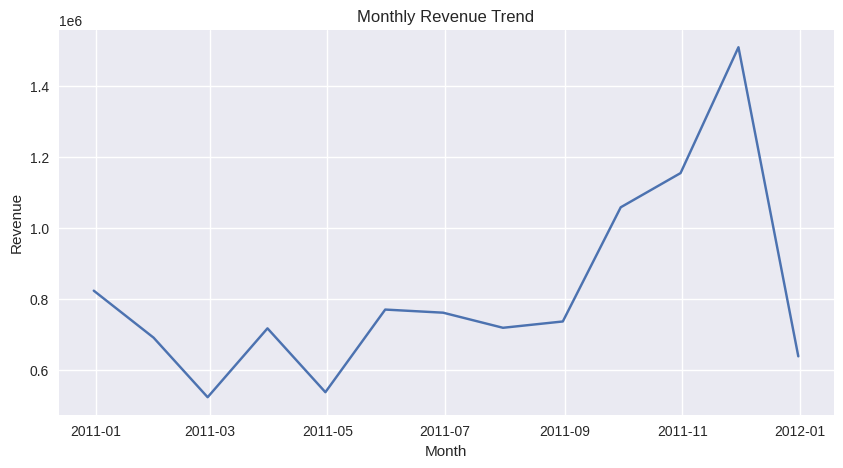

In [16]:
monthly_revenue = (
    df
    .set_index("InvoiceDate")
    .resample("M")["Revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["InvoiceDate"], monthly_revenue["Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.savefig("../images/monthly_revenue_trend.png", bbox_inches="tight")
plt.show()

Key Insight — Revenue Seasonality

Monthly revenue exhibits clear seasonality, with pronounced peaks toward the end of the year. This pattern is consistent with holiday-driven demand and suggests opportunities for proactive inventory planning, staffing, and targeted promotional campaigns in Q4.


     

## Customer Behaviour Analysis


In [17]:
customer_orders["customer_type"] = np.where(
    customer_orders["num_orders"] > 1,
    "Repeat Customer",
    "One-time Customer"
)

customer_orders["customer_type"].value_counts()


,count
customer_type,
Repeat Customer,2845
One-time Customer,1494


In [18]:
customer_revenue = (
    df.merge(customer_orders, on="CustomerID", how="left")
    .groupby("customer_type")["Revenue"]
    .sum()
    .reset_index()
)

customer_revenue


,customer_type,Revenue
0,One-time Customer,616311.731
1,Repeat Customer,8295096.173


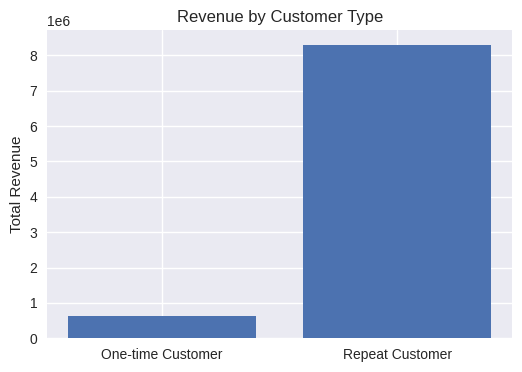

In [20]:
plt.figure(figsize=(6,4))
plt.bar(customer_revenue["customer_type"], customer_revenue["Revenue"])
plt.title("Revenue by Customer Type")
plt.ylabel("Total Revenue")
plt.savefig("../images/revenue_by_customer_type.png", bbox_inches="tight")


plt.show()


### Key Insight — Customer Behaviour

Repeat customers generate a disproportionately large share of total revenue compared to one-time buyers. This highlights the critical role of customer retention and supports investment in loyalty programs, personalised offers, and re-engagement strategies.

## Product Performance Analysis


In [21]:
top_products = (
    df.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values(by="Revenue", ascending=False)
    .head(10)
)

top_products


,StockCode,Description,Revenue
4307,DOT,DOTCOM POSTAGE,206248.77
1315,22423,REGENCY CAKESTAND 3 TIER,174484.74
2687,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3925,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29
2772,47566,PARTY BUNTING,99504.33
3912,85099B,JUMBO BAG RED RETROSPOT,94340.05
2131,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
4308,M,Manual,78110.27
4310,POST,POSTAGE,78101.88
2028,23084,RABBIT NIGHT LIGHT,66964.99


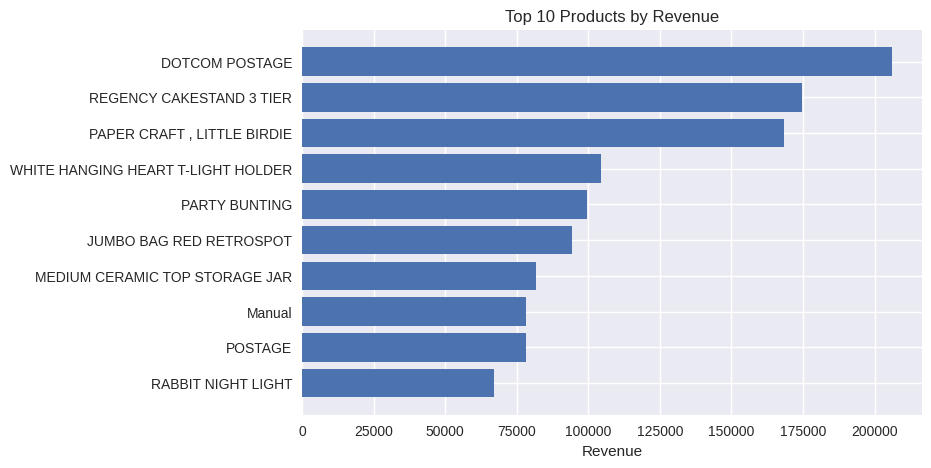

In [23]:
plt.figure(figsize=(8,5))
plt.barh(top_products["Description"], top_products["Revenue"])
plt.xlabel("Revenue")
plt.title("Top 10 Products by Revenue")
plt.gca().invert_yaxis()

plt.savefig("../images/top_products_revenue.png", bbox_inches="tight")


plt.show()


### Key Insight — Product Performance

Revenue is concentrated among a small subset of products, indicating a strong Pareto effect. Prioritising high-performing products in inventory planning, pricing optimisation, and marketing campaigns could significantly improve overall revenue performance.


## Revenue Analysis by Country


In [33]:
# Revenue by country
country_revenue = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue


,Revenue
Country,
United Kingdom,9003097.964
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


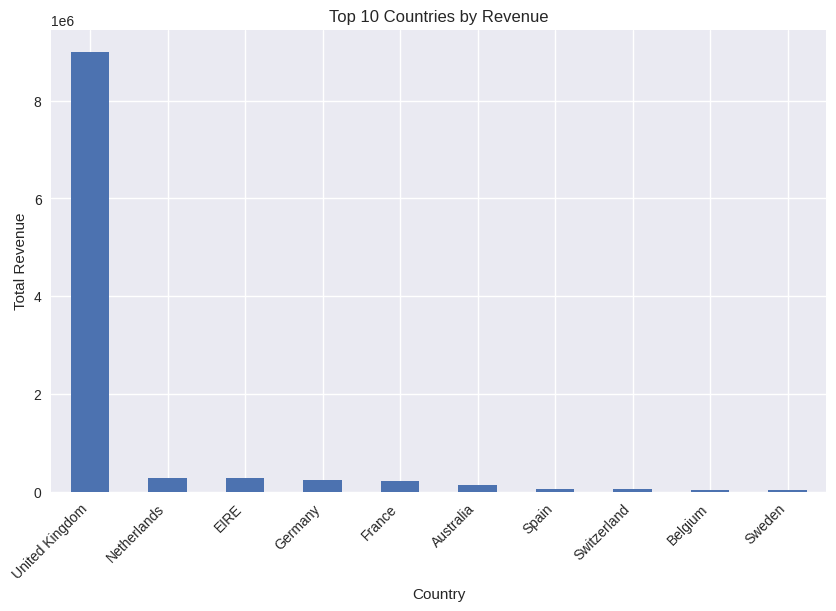

In [34]:
plt.figure(figsize=(10,6))
country_revenue.plot(kind="bar")

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")

plt.savefig("../images/revenue_by_country.png", bbox_inches="tight")
plt.show()

### Insight — Geographic Revenue Concentration

Revenue is highly concentrated in a small number of countries, with the United Kingdom accounting for the vast majority of sales. This indicates strong geographic dependence and highlights opportunities for targeted international expansion and country-specific marketing strategies.

**Business implication:**  
This suggests opportunities for targeted regional marketing strategies and selective international expansion to diversify revenue sources.


In [32]:
# Top customers by revenue
top_customers = (
    df.groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


### Insight
A small group of customers contributes disproportionately to total revenue.
This highlights the importance of customer retention strategies and personalised engagement for high-value customers.


In [26]:
top_products = (
    df.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


top_products


,Revenue
Description,
DOTCOM POSTAGE,206248.77
REGENCY CAKESTAND 3 TIER,174484.74
"PAPER CRAFT , LITTLE BIRDIE",168469.60
WHITE HANGING HEART T-LIGHT HOLDER,106292.77
PARTY BUNTING,99504.33
JUMBO BAG RED RETROSPOT,94340.05
MEDIUM CERAMIC TOP STORAGE JAR,81700.92
Manual,78112.82
POSTAGE,78101.88


#Key Insight — Product Performance
Revenue is concentrated among a limited set of products.
Optimising inventory and promotions around these high-performing products could significantly impact overall sales performance.

In [27]:
customer_revenue



,customer_type,Revenue
0,One-time Customer,616311.731
1,Repeat Customer,8295096.173


In [ ]:
customer_revenue.index

In [30]:
repeat_revenue = customer_revenue.loc[
    customer_revenue["customer_type"] == "Repeat Customer",
    "Revenue"
].values[0]

repeat_ratio = repeat_revenue / customer_revenue["Revenue"].sum()
repeat_ratio



np.float64(0.9308401391071593)

In [31]:
customer_revenue_indexed = customer_revenue.set_index("customer_type")

repeat_ratio = (
    customer_revenue_indexed.loc["Repeat Customer", "Revenue"]
    / customer_revenue_indexed["Revenue"].sum()
)
repeat_ratio


np.float64(0.9308401391071593)

#Customer Purchase Frequency

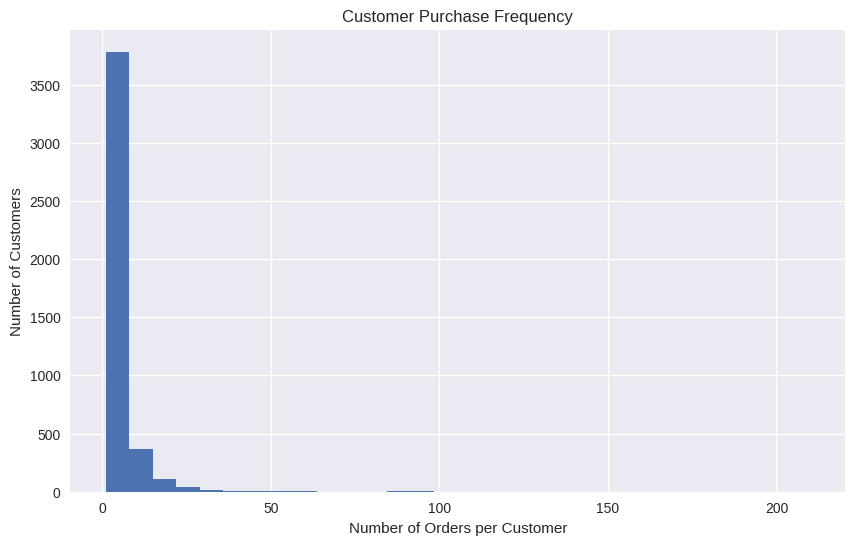

In [37]:
customer_orders = (
    df.groupby("CustomerID")["InvoiceNo"]
    .nunique()
)



plt.figure(figsize=(10,6))
plt.hist(customer_orders, bins=30)

plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")

plt.savefig("../images/customer_purchase_frequency.png", bbox_inches="tight")
plt.show()




#All images downloaded

In [38]:
from google.colab import files
import glob

for file in glob.glob("../images/*.png"):
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Executive Summary

## Executive Summary

- Revenue is heavily concentrated geographically, with the UK contributing the largest share of total sales.
- Monthly revenue shows clear seasonality, with strong peaks toward the end of the year, indicating holiday-driven demand patterns.
- Customer retention is a major revenue driver: **repeat customers generate ~93% of total revenue**, highlighting strong ROI potential for loyalty and lifecycle marketing.
- Product revenue is highly concentrated, where a small set of items accounts for a significant portion of sales, suggesting opportunities to prioritise high-performing products in pricing, inventory, and promotion planning.


## Key Business Insights & Recommendations

## Recommendations

1. Prioritise retention strategies (loyalty, targeted offers, win-back campaigns) given repeat customers drive ~93% of revenue.
2. Plan inventory and promotions around seasonal peaks (especially year-end) to reduce stockouts and maximise revenue.
3. Focus merchandising and pricing efforts on top-revenue products while monitoring dependency risk from over-concentration.
4. Explore selective geographic growth beyond top countries to diversify revenue sources.



## KPI Summary
- Revenue concentration by country
- Monthly revenue trend and seasonality
- Revenue share by customer type (repeat vs one-time)
- Top-performing products by revenue
